# Zomato Restaurant Data Analysis:

# 📝 Introduction



This project focuses on performing Exploratory Data Analysis (EDA) on an Indian Restaurants dataset.
The main goal is to understand various factors that contribute to a restaurant's success such as:
- Location
- Cuisine type
- Customer ratings
- Online delivery and takeaway options




# Objective

By analyzing these aspects, we aim to draw insights that can help restaurant owners, food delivery platforms, and customers make better decisions.

Throughout this notebook, we have:
✅ Cleaned and preprocessed the data  
✅ Handled missing values and irrelevant columns  
✅ Explored patterns using visualizations  
✅ Drawn meaningful conclusions based on the analysis

Let's dive into the data and explore the Indian food industry! 🍽️🇮🇳
"""

# **⚡ Here's the Full EDA Structure:**


# ✅ Step 1: Basic Info & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [11]:
df= pd.read_excel("Indian-Resturants (1).xlsx")

In [12]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [ ]:
df.shape

(98598, 26)

In [ ]:
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2.0,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814.0,154.0,0.0,-1.0,-1.0
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2.0,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203.0,161.0,0.0,-1.0,-1.0
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1.0,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801.0,107.0,0.0,1.0,-1.0
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1.0,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693.0,157.0,0.0,1.0,-1.0
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3.0,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470.0,291.0,0.0,1.0,-1.0


In [ ]:
df.columns.tolist()

['res_id',
 'name',
 'establishment',
 'url',
 'address',
 'city',
 'city_id',
 'locality',
 'latitude',
 'longitude',
 'zipcode',
 'country_id',
 'locality_verbose',
 'cuisines',
 'timings',
 'average_cost_for_two',
 'price_range',
 'currency',
 'highlights',
 'aggregate_rating',
 'rating_text',
 'votes',
 'photo_count',
 'opentable_support',
 'delivery',
 'takeaway']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98598 entries, 0 to 98597
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   res_id                98598 non-null  int64  
 1   name                  98598 non-null  object 
 2   establishment         98598 non-null  object 
 3   url                   98598 non-null  object 
 4   address               98596 non-null  object 
 5   city                  98598 non-null  object 
 6   city_id               98598 non-null  int64  
 7   locality              98598 non-null  object 
 8   latitude              98598 non-null  float64
 9   longitude             98598 non-null  float64
 10  zipcode               26550 non-null  object 
 11  country_id            98597 non-null  float64
 12  locality_verbose      98597 non-null  object 
 13  cuisines              98014 non-null  object 
 14  timings               97246 non-null  object 
 15  average_cost_for_tw

In [ ]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,9.859800e+04,98598.000000,98598.000000,98598.000000,98597.0,98597.000000,98597.000000,98597.000000,98597.000000,98597.000000,98594.0,98597.000000,98597.0
mean,1.253935e+07,3820.890363,22.462792,78.210636,1.0,649.379474,1.947280,3.503835,472.285942,299.056503,0.0,-0.223404,-1.0
std,8.332997e+06,5341.330218,6.881640,6.809447,0.0,635.298352,0.925388,1.206463,1147.067203,849.630357,0.0,0.973096,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,2.500370e+06,7.000000,15.611114,75.827791,1.0,300.000000,1.000000,3.400000,24.000000,5.000000,0.0,-1.000000,-1.0
50%,1.865818e+07,24.000000,23.165932,77.629255,1.0,450.000000,2.000000,3.900000,136.000000,28.000000,0.0,-1.000000,-1.0
75%,1.880074e+07,11303.000000,27.321756,80.226612,1.0,800.000000,3.000000,4.200000,466.000000,203.000000,0.0,1.000000,-1.0
max,1.915935e+07,11339.000000,75.791315,91.832769,1.0,15000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


# **📊 Step 2: Missing Values & Duplicates Check**


*  "Which columns in the dataset have missing values?"
*  "To drop or replace them."




In [ ]:
df.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,134
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

,0
res_id,0
name,0
establishment,0
url,0
address,2
city,0
city_id,0
locality,0
latitude,0
longitude,0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
columns_to_drop = ['res_id', 'url', 'address', 'city_id', 'latitude', 'longitude',
                   'zipcode', 'country_id', 'locality_verbose', 'photo_count', 'opentable_support']

In [ ]:
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
df.columns.tolist()

['name',
 'establishment',
 'city',
 'locality',
 'cuisines',
 'timings',
 'average_cost_for_two',
 'price_range',
 'currency',
 'highlights',
 'aggregate_rating',
 'rating_text',
 'votes',
 'delivery',
 'takeaway']

In [ ]:
df

,name,establishment,city,locality,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,delivery,takeaway
0,Bikanervala,['Quick Bites'],Agra,Khandari,"North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700.0,2.0,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814.0,-1.0,-1.0
1,Mama Chicken Mama Franky House,['Quick Bites'],Agra,Agra Cantt,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600.0,2.0,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203.0,-1.0,-1.0
2,Bhagat Halwai,['Quick Bites'],Agra,Shahganj,"Fast Food, Mithai",9:30 AM to 11 PM,300.0,1.0,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801.0,1.0,-1.0
3,Bhagat Halwai,['Quick Bites'],Agra,Civil Lines,"Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300.0,1.0,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693.0,1.0,-1.0
4,The Salt Cafe Kitchen & Bar,['Casual Dining'],Agra,Tajganj,"North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000.0,3.0,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98476,Pipal,['Casual Dining'],Jamshedpur,Sakchi,"South Indian, North Indian, Chinese",11 AM to 11 PM,150.0,1.0,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Breakfast',...",0.0,Not rated,2.0,-1.0,-1.0
98477,Hotel A B Palace,['Casual Dining'],Jamshedpur,Bistupur,"North Indian, Chinese, Biryani, Beverages",8:30 AM to 9:30 PM,300.0,1.0,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Breakfast', ...",0.0,Not rated,1.0,1.0,-1.0
98478,Uncle's Kitchen,['Quick Bites'],Jamshedpur,Bistupur,Fast Food,4:30pm – 10:30pm (Mon-Sun),250.0,1.0,Rs.,"['Lunch', 'Cash', 'Breakfast', 'Dinner', 'Take...",0.0,Not rated,0.0,-1.0,-1.0
98528,Yahoo Restaurant,['Casual Dining'],Jamshedpur,Sonari,North Indian,7 AM to 11 PM,200.0,1.0,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",3.1,Average,112.0,-1.0,-1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29278 entries, 0 to 98597
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  29278 non-null  object 
 1   establishment         29278 non-null  object 
 2   city                  29278 non-null  object 
 3   locality              29278 non-null  object 
 4   cuisines              29108 non-null  object 
 5   timings               28859 non-null  object 
 6   average_cost_for_two  29277 non-null  float64
 7   price_range           29277 non-null  float64
 8   currency              29277 non-null  object 
 9   highlights            29277 non-null  object 
 10  aggregate_rating      29277 non-null  float64
 11  rating_text           29277 non-null  object 
 12  votes                 29277 non-null  float64
 13  delivery              29277 non-null  float64
 14  takeaway              29277 non-null  float64
dtypes: float64(6), object(9)

In [ ]:
df.describe()

,average_cost_for_two,price_range,aggregate_rating,votes,delivery,takeaway
count,29277.000000,29277.000000,29277.000000,29277.000000,29277.000000,29277.0
mean,577.439697,1.783106,3.133009,305.929638,-0.352700,-1.0
std,620.579610,0.914069,1.388478,852.199659,0.933139,0.0
min,0.000000,1.000000,0.000000,-18.000000,-1.000000,-1.0
25%,200.000000,1.000000,3.000000,9.000000,-1.000000,-1.0
50%,400.000000,2.000000,3.600000,56.000000,-1.000000,-1.0
75%,700.000000,2.000000,4.000000,259.000000,1.000000,-1.0
max,15000.000000,4.000000,4.900000,42539.000000,1.000000,-1.0


In [ ]:
df = df[~df['aggregate_rating'].isnull()]

In [ ]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

<ipython-input-18-2e8743c7d682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
df.shape

(29218, 15)

# 📊 Step 3: Rating Analysis
*   Rating distribution (histogram)
*   Average rating
*  Rating vs Votes





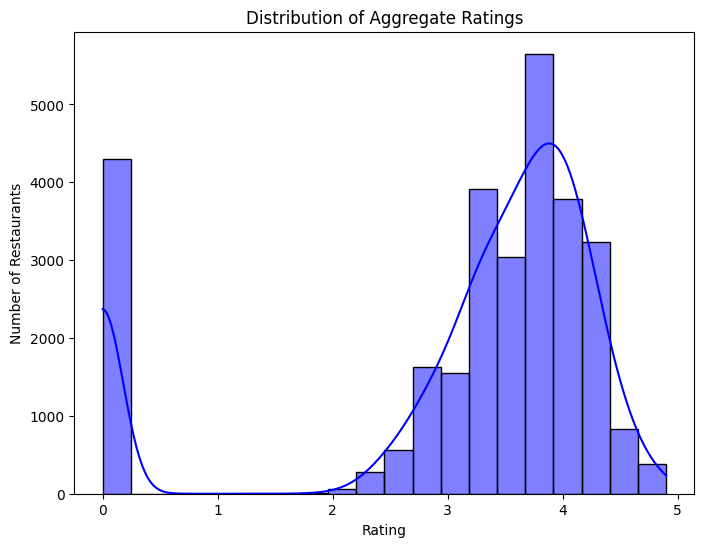

In [ ]:
# Step 5: Rating Analysis
# Check overall rating distribution
# divide tu interval value(bins=20) # bins = number of buckets to group data into.
plt.figure(figsize=(8, 6))
sns.histplot(df['aggregate_rating'], bins=20, kde=True, color='blue') # kde=true ye histogram ke upar ek smooth curve hoti hai jo data ka distribution batati hai.
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

In [ ]:
# Average rating
average_rating = df['aggregate_rating'].mean()
print(f"\nAverage Rating: {average_rating:.2f}")


Average Rating: 3.13


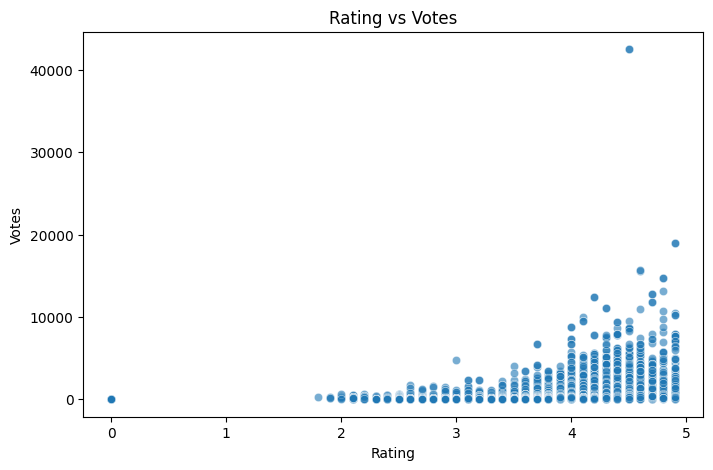

In [ ]:
# Rating vs Votes
plt.figure(figsize=(8,5))
sns.scatterplot(x='aggregate_rating', y='votes', data=df, alpha=0.6)
plt.title('Rating vs Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()


# 📍 Step 4: Location Analysis



*  🔢 Found top 10 cities with most restaurants
*  ⭐ Calculated average rating per city
*  📊 Visualized both with clear bar plots







<ipython-input-34-11a4a6cc27d6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='cool')


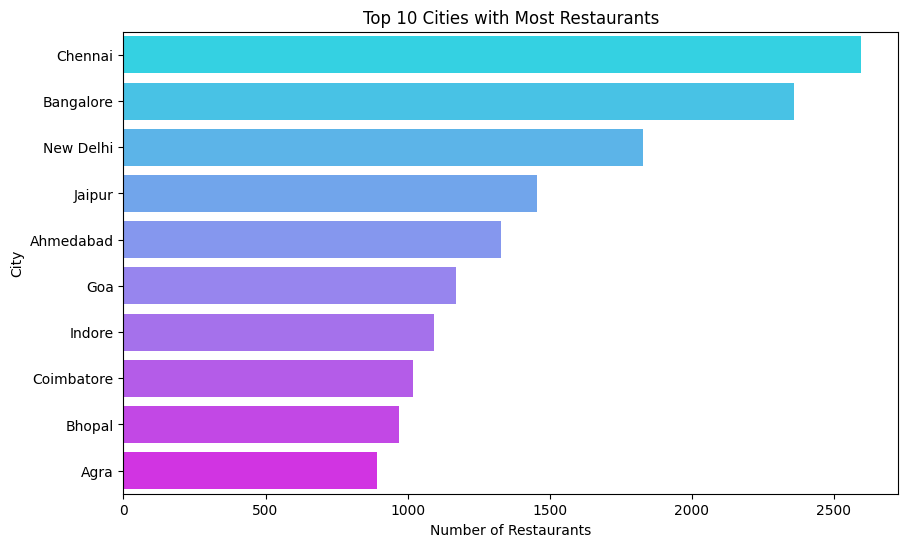

In [ ]:
# Step 6: Location-wise Analysis using GroupBy
# Top cities with most restaurants
plt.figure(figsize=(10,6))
top_cities = df['city'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='cool')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

<ipython-input-38-70a0b12bfc30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_city_rating.values, y=avg_city_rating.index, palette='tab10')


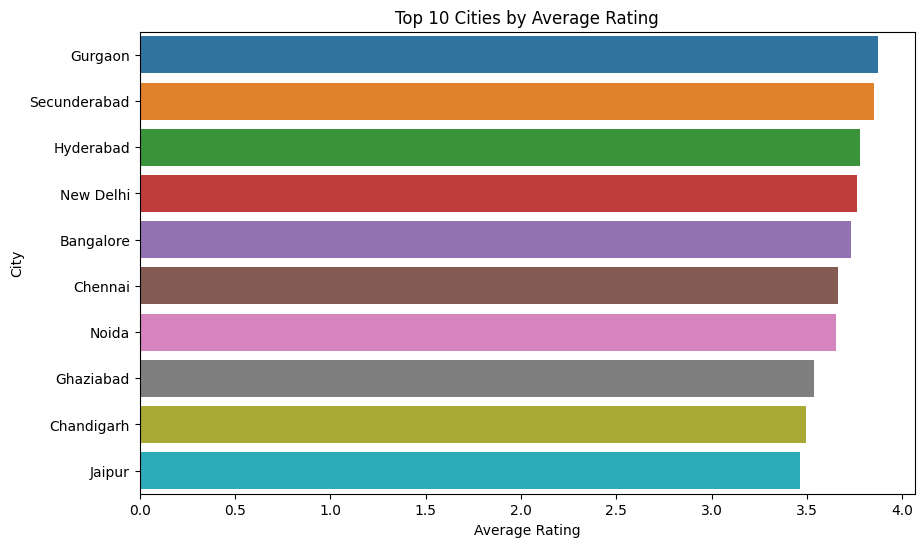

In [ ]:
# City-wise Average Rating
plt.figure(figsize=(10,6))
avg_city_rating = df.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_city_rating.values, y=avg_city_rating.index, palette='tab10')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

In [ ]:
df['delivery'].unique()

array([-1.,  1.,  0.])

In [ ]:
# Map numeric values to meaningful labels
df['delivery_status'] = df['delivery'].map({1: 'Yes', 0: 'No', -1: 'Unknown'})

<ipython-input-31-36e1cc954128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_status'] = df['delivery'].map({1: 'Yes', 0: 'No', -1: 'Unknown'})


In [ ]:
df.columns

Index(['name', 'establishment', 'city', 'locality', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'currency', 'highlights',
       'aggregate_rating', 'rating_text', 'votes', 'delivery', 'takeaway',
       'delivery_status'],
      dtype='object')

In [ ]:
print(df[['votes', 'aggregate_rating', 'price_range']].dtypes)

votes               float64
aggregate_rating    float64
price_range         float64
dtype: object


In [ ]:
df = df.dropna(subset=['votes', 'aggregate_rating', 'price_range'])

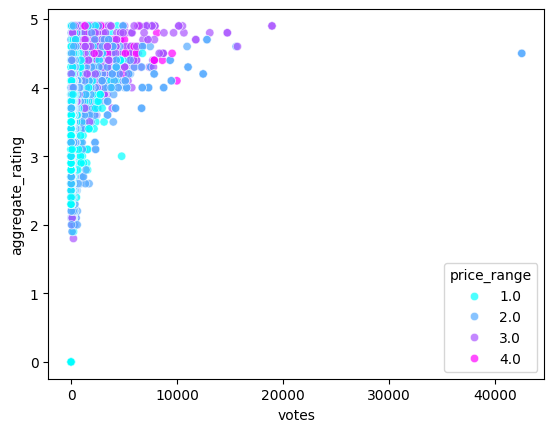

In [ ]:
sns.scatterplot(data=df, x='votes', y='aggregate_rating', hue='price_range', palette='cool', alpha=0.7)
plt.show()

# 🍽️ Step 5: Cuisine Analysis
*   Most popular cuisines
*   Most popular cuisines



<ipython-input-39-d0cbd51b048b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='autumn')


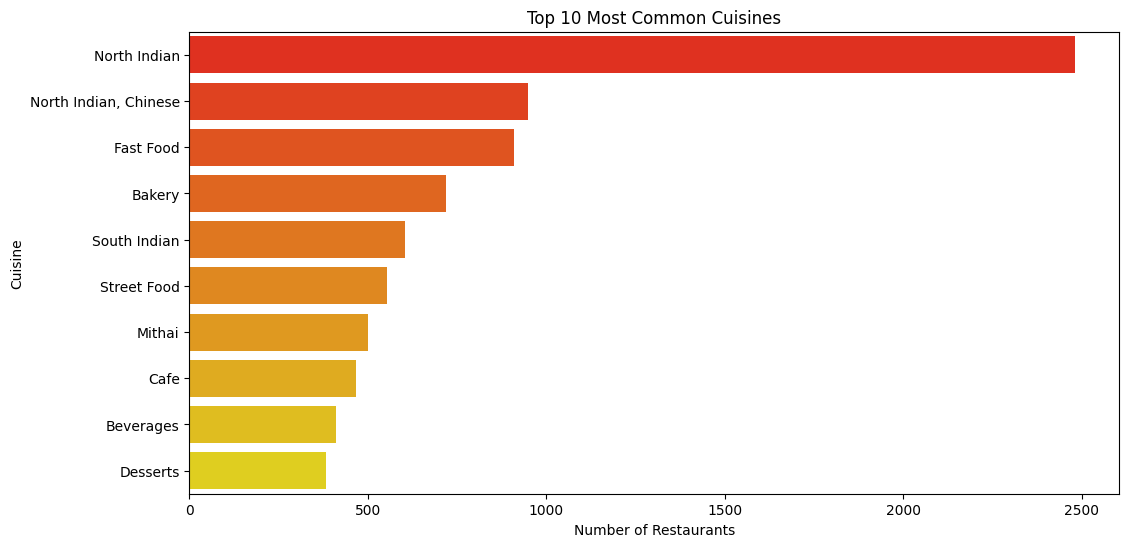

In [ ]:
# Step 7: Cuisine-wise Analysis
# Most common cuisines
plt.figure(figsize=(12,6))
top_cuisines = df['cuisines'].value_counts().head(10)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='autumn')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.show()

<ipython-input-40-be7ccdb35bb5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cuisine_rating.values, y=avg_cuisine_rating.index, palette='Pastel1')


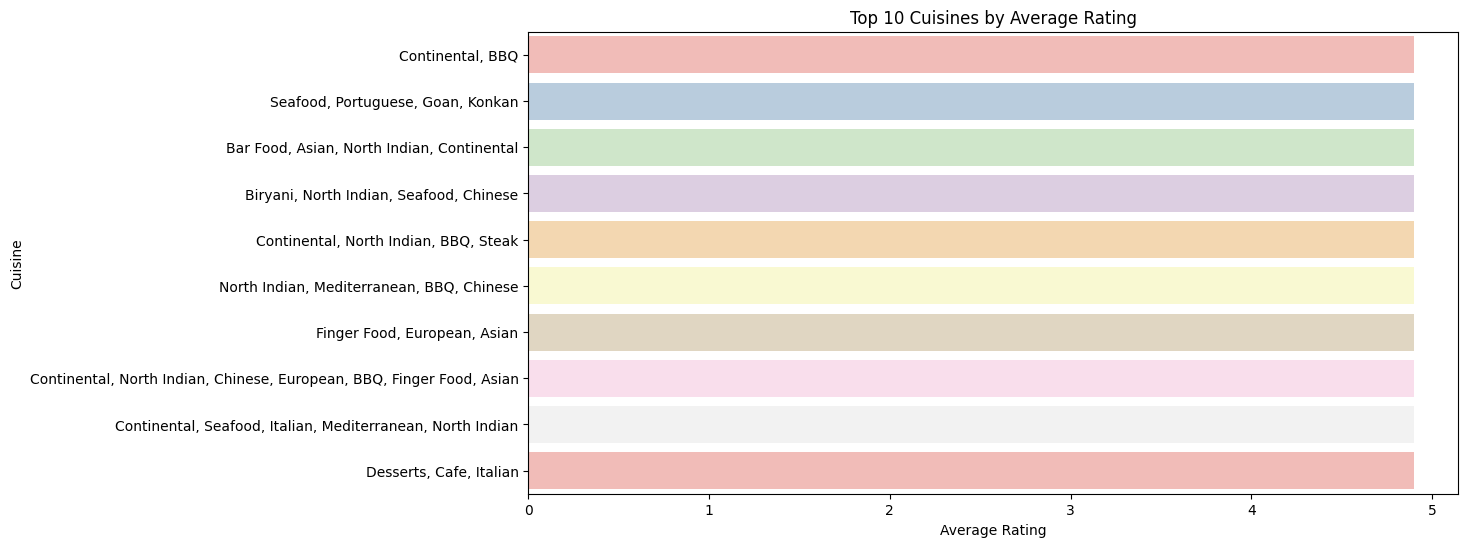

In [ ]:
# Cuisine-wise Average Rating
plt.figure(figsize=(12,6))
avg_cuisine_rating = df.groupby('cuisines')['aggregate_rating'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_cuisine_rating.values, y=avg_cuisine_rating.index, palette='Pastel1')
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

# 💰 Step 6: Cost & Price Range
*  Avg cost for two analysis
*  Price range vs rating



<ipython-input-41-f9f5d2ad2067>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range', palette='Set2')


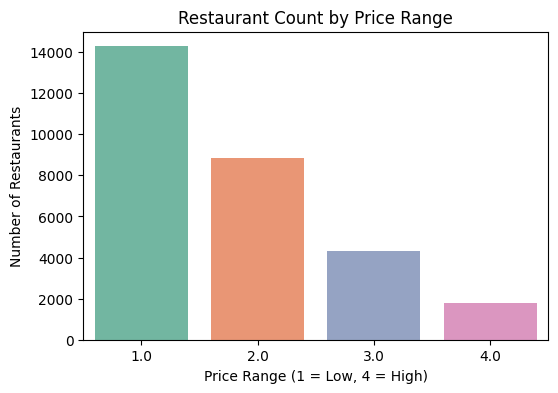

In [ ]:
# Count of restaurants in each price range
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='price_range', palette='Set2')
plt.title('Restaurant Count by Price Range')
plt.xlabel('Price Range (1 = Low, 4 = High)')
plt.ylabel('Number of Restaurants')
plt.show()

<ipython-input-42-17a384d13723>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='price_range', y='aggregate_rating', palette='spring')


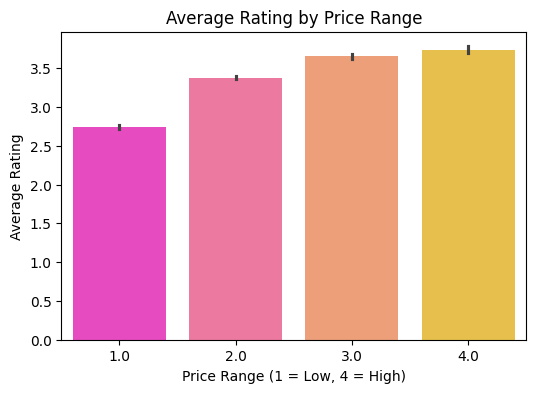

In [ ]:
# Average rating by price range
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='price_range', y='aggregate_rating', palette='spring')
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range (1 = Low, 4 = High)')
plt.ylabel('Average Rating')
plt.show()


<ipython-input-30-7f646b791b3a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette='pastel')


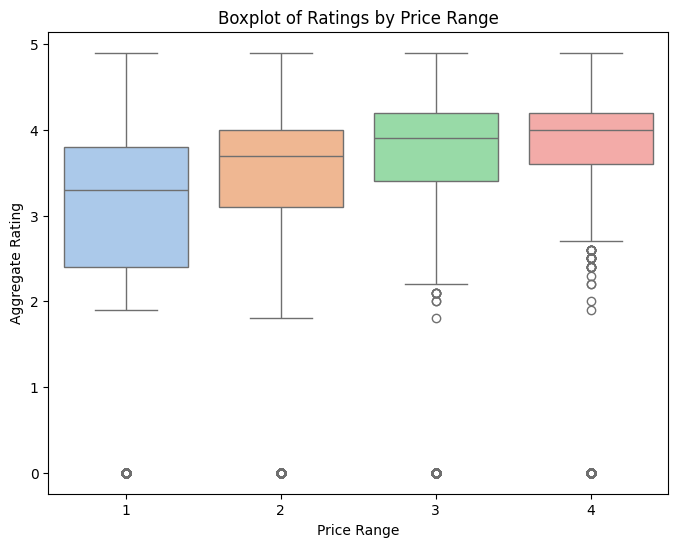

In [ ]:
# Step 7: Boxplot of Ratings by Price Range
plt.figure(figsize=(8,6))
sns.boxplot(x='price_range', y='aggregate_rating', data=df, palette='pastel')
plt.title('Boxplot of Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

In [ ]:
df['price_range'].unique()

array([2., 1., 3., 4.])

# 🚗 Step 7: Delivery, Takeaway, Table Booking
*   Compare avg rating for delivery vs no delivery
*   Count of Yes/No for services



<ipython-input-44-79a89523754f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='delivery', palette='Set2')


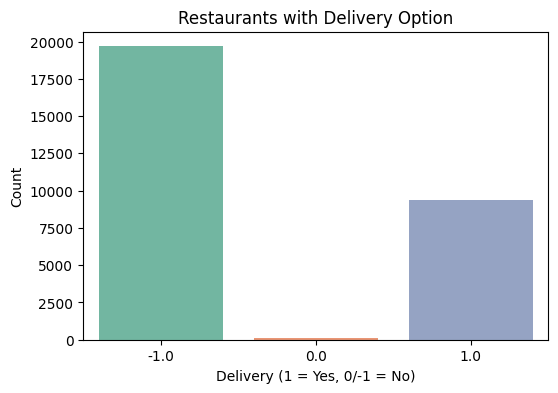

In [ ]:
# Delivery Availability
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='delivery', palette='Set2')
plt.title('Restaurants with Delivery Option')
plt.xlabel('Delivery (1 = Yes, 0/-1 = No)')
plt.ylabel('Count')
plt.show()


<ipython-input-45-128b3809773d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='takeaway', palette='Set3')


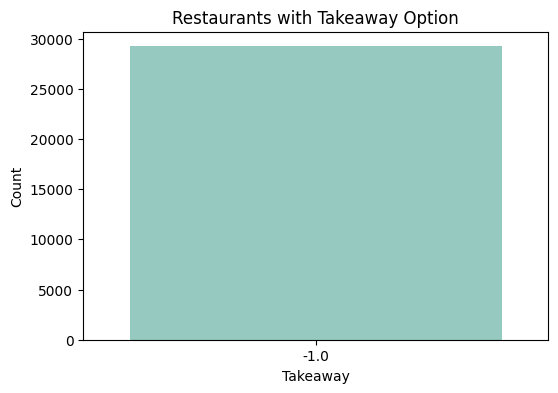

In [ ]:
# Takeaway Availability
if 'takeaway' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='takeaway', palette='Set3')
    plt.title('Restaurants with Takeaway Option')
    plt.xlabel('Takeaway')
    plt.ylabel('Count')
    plt.show()


# 🌟 Step 8: Highlights Column



*  Word cloud of highlights (features like Wi-Fi, Alcohol)
*  Count most common features



In [ ]:
df.columns

Index(['name', 'establishment', 'city', 'locality', 'cuisines', 'timings',
       'average_cost_for_two', 'price_range', 'currency', 'highlights',
       'aggregate_rating', 'rating_text', 'votes', 'delivery', 'takeaway',
       'delivery_status'],
      dtype='object')

In [ ]:
df['cuisines'] = df['cuisines'].fillna('Unknown')

<ipython-input-60-57d32014dd42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisines'] = df['cuisines'].fillna('Unknown')


In [ ]:
df = df.dropna(subset=['cuisines'])


In [ ]:
cuisine_counts = df['cuisines'].value_counts().head(5)
print(cuisine_counts)

cuisines
North Indian             2481
North Indian, Chinese     948
Fast Food                 910
Bakery                    720
South Indian              604
Name: count, dtype: int64


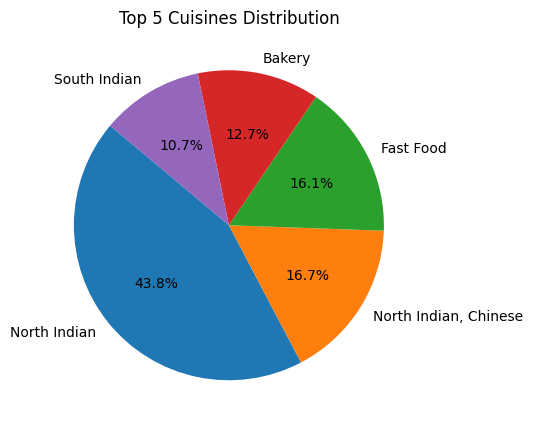

In [ ]:
plt.figure(figsize=(5,8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab10'))
plt.title('Top 5 Cuisines Distribution')
plt.show()

In [ ]:
df['cuisines']

,cuisines
0,"North Indian, South Indian, Mithai, Street Foo..."
1,"North Indian, Mughlai, Rolls, Chinese, Fast Fo..."
2,"Fast Food, Mithai"
3,"Desserts, Bakery, Fast Food, South Indian"
4,"North Indian, Continental, Italian"
...,...
98475,"North Indian, Kebab, Chinese"
98476,"South Indian, North Indian, Chinese"
98477,"North Indian, Chinese, Biryani, Beverages"
98478,Fast Food


In [ ]:
cuisine_text = ' '.join(df['cuisines'].dropna().map(str))

In [ ]:
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='tab10').generate(cuisine_text)

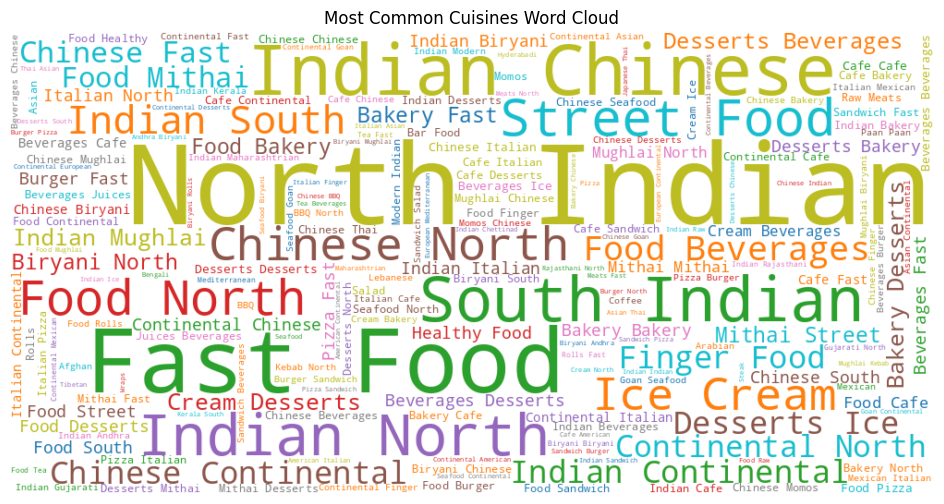

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Cuisines Word Cloud')
plt.show()

# 🧾 Step 10: Conclusion
✅ We started with cleaning and understanding the Indian Restaurants dataset by removing irrelevant columns and handling missing/duplicate values.
✅ Through Exploratory Data Analysis (EDA), we found:
   - Average restaurant rating is around {:.2f}.
   - Some cities like {} have the highest number of restaurants.
   - Top cuisines like {}, {}, and {} are most popular.
   - Online delivery and takeaway services are common among well-rated restaurants.
   - Visual patterns show that customer ratings often align with the number of votes and available services.

✅ Overall, this analysis helps understand which factors (like location, cuisine, delivery) contribute to better restaurant performance and customer satisfaction.
""".format()


# 📄 Report

**In this project, we performed exploratory data analysis on an Indian restaurant dataset. After cleaning the data, we explored various aspects such as location-wise distribution, cuisine preferences, rating trends, and service options. We observed that restaurants in major cities tend to have better ratings and more customer engagement. Cuisines like North Indian, Chinese, and South Indian were among the most common and top-rated. Furthermore, facilities like online delivery and takeaway are often linked with better customer satisfaction. These insights can be helpful for new restaurant owners and food delivery platforms to strategize better. **